In [8]:
from  load_data import *
from process_ir_data import *

<AxesSubplot:xlabel='Relative Time'>

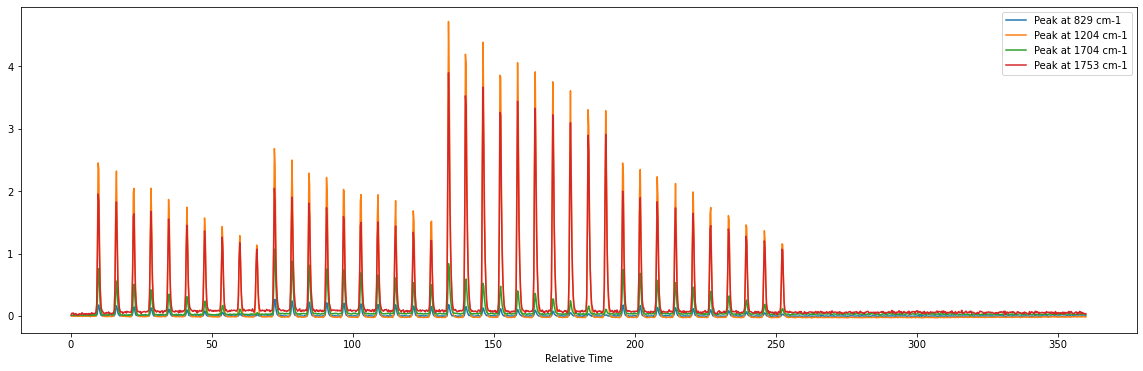

In [10]:
# Instantiate class
Data()

# Load data to dataframe
ir_data = Data.read()

# Visualise the data
Data.plot(ir_data)

#ir_data

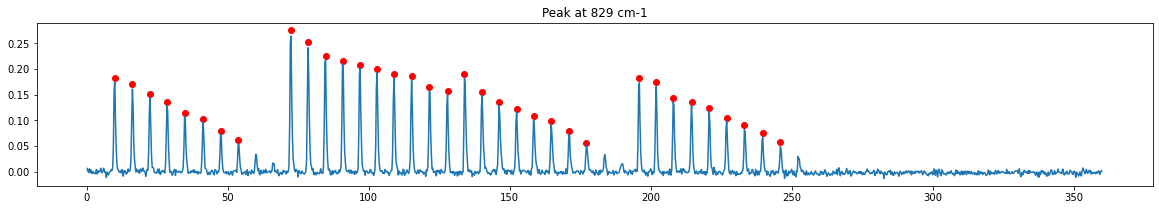

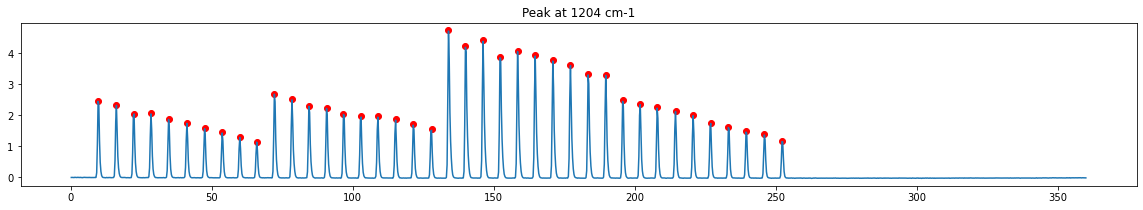

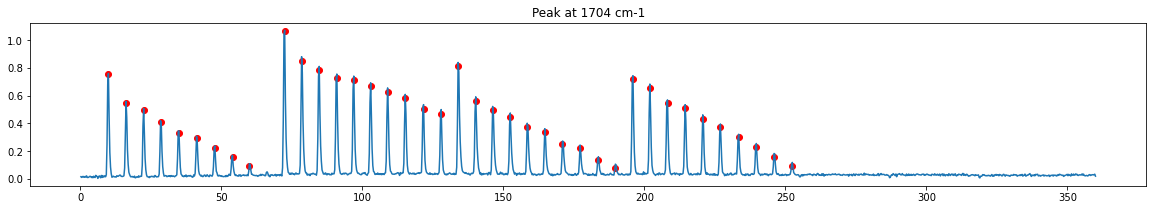

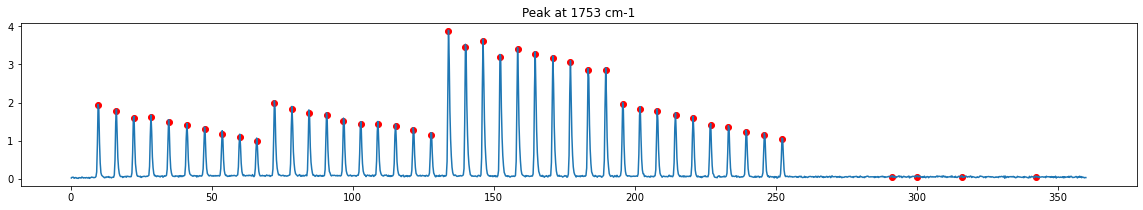

In [11]:
# Instantiate class - doesn't work as Peaks(ir_data), I have to use Peaks = Peaks(ir_data), why?
Peaks = Peaks(ir_data)

# Determine the peak prominences of the data
processed_ir_data = Peaks.prominence(0.05)

# Determine the experimental areas of each peak - must be only one wavelength
#processed_ir_data = Peaks.exp_area(0.05, 6, 'Peak at 1704 cm-1')

# Fit a gaussian to each peak and determine it's area - must be only one wavelength
#Peaks.fitted_area_sp(0.05, 6, 'Peak at 1704 cm-1', 0)

# Find out which peaks have been picked
Peaks.plot(processed_ir_data)

SyntaxError: invalid syntax (<ipython-input-13-a06dda80af8f>, line 1)